In [1]:
# read nc output from WAOM 4km run and plot TS diagrams for East Antarctica sections

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import matplotlib as mpl
#mpl.use('Agg')

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import iris
import iris.iterate
import iris.coords
import iris.plot as iplt
import gsw

In [2]:
# make grid for density contours
# ax.set_xlim([34,34.7])
# ax.set_ylim([-2.7,-1])

smin = 34 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 35. + (0.01 * 35.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -2.7 + (0.1 * -2.7)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = -.5 + (0.1 * -.5)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-2.7,-.5,ydim)
si = np.linspace(34,35,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
print(np.max(dens),np.min(dens))

tmin, tmax, smin, smax sizes=, -2.97 -0.55 33.7 35.35
28.069824168188234 27.195621126439846


In [3]:
# load vars for TS plot
count = 0
monthly_ind_ini = [0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67]
monthly_ind_end = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 73]

# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho10 = dx.variables["lat_rho"]
lon_rho10 = dx.variables["lon_rho"]
dx.close()

# WAOM10extend
# ps: iceshelf needs to cut setion
# WWed lonmax = -76; eta = 320:389

WWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc'
print(WWed10)
z_rho_WWed10_tmp = iris.load_cube(WWed10, 'z_rho')
Hsbl_WWed10 = iris.load_cube(WWed10, 'Hsbl')
temp_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged potential temperature')
salt_WWed10_tmp = iris.load_cube(WWed10, 'time-averaged salinity')
temp_WWed10 = temp_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed10 = salt_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed10 = z_rho_WWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed10 = z_rho_WWed10.coord('bathymetry at RHO-points').points
rho_WWed10 = gsw.rho(xr.DataArray.from_iris(salt_WWed10),xr.DataArray.from_iris(temp_WWed10),0) - 1000
lat_WWed10_tmp = dx.lat_rho.isel(xi_rho=170, eta_rho=slice(320,389))
z_rho_WWed10b = xr.DataArray.from_iris(z_rho_WWed10)
z_WWed10_mask = ma.array(z_rho_WWed10b,mask=np.isnan(z_rho_WWed10b))
lat_WWed10 = np.ones((31,69))
for ii in np.arange(0,31):
    lat_WWed10[ii,:] = lat_WWed10_tmp
lat_WWed10_mask =  ma.array(lat_WWed10,mask=np.isnan(lat_WWed10))
print(temp_WWed10_tmp.shape,salt_WWed10_tmp.shape,depth_WWed10.shape, temp_WWed10.shape, z_rho_WWed10.shape, depth_WWed10.shape)

EWed10 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc'
print(EWed10)
z_rho_EWed10_tmp = iris.load_cube(EWed10, 'z_rho')
Hsbl_EWed10 = iris.load_cube(EWed10, 'Hsbl')
temp_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged potential temperature')
salt_EWed10_tmp = iris.load_cube(EWed10, 'time-averaged salinity')
temp_EWed10 = temp_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed10 = salt_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed10 = z_rho_EWed10_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed10 = z_rho_EWed10.coord('bathymetry at RHO-points').points
rho_EWed10 = gsw.rho(xr.DataArray.from_iris(salt_EWed10),xr.DataArray.from_iris(temp_EWed10),0) - 1000
lat_EWed10_tmp = dx.lat_rho.isel(xi_rho=200, eta_rho=slice(330,394))
z_rho_EWed10b = xr.DataArray.from_iris(z_rho_EWed10)
z_EWed10_mask = ma.array(z_rho_EWed10b,mask=np.isnan(z_rho_EWed10b))
lat_EWed10 = np.ones((31,64))
for ii in np.arange(0,31):
    lat_EWed10[ii,:] = lat_EWed10_tmp
lat_EWed10_mask =  ma.array(lat_EWed10,mask=np.isnan(lat_EWed10))
print(temp_EWed10_tmp.shape,salt_EWed10_tmp.shape,depth_EWed10.shape, temp_EWed10.shape, z_rho_EWed10.shape, depth_EWed10.shape)



/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 69, 10) (73, 31, 69, 10) (69, 10) (31, 69, 10) (31, 69, 10) (69, 10)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM10extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 64, 10) (73, 31, 64, 10) (64, 10) (31, 64, 10) (31, 64, 10) (64, 10)


In [4]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho4 = dx.variables["lat_rho"]
lon_rho4 = dx.variables["lon_rho"]
dx.close()

# WAOM4extend
WWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc'
print(WWed4)
z_rho_WWed4_tmp = iris.load_cube(WWed4, 'z_rho')
Hsbl_WWed4 = iris.load_cube(WWed4, 'Hsbl')
temp_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged potential temperature')
salt_WWed4_tmp = iris.load_cube(WWed4, 'time-averaged salinity')
temp_WWed4 = temp_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed4 = salt_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed4 = z_rho_WWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed4 = z_rho_WWed4.coord('bathymetry at RHO-points').points
rho_WWed4 = gsw.rho(xr.DataArray.from_iris(salt_WWed4),xr.DataArray.from_iris(temp_WWed4),0) - 1000
lat_WWed4_tmp = dx.lat_rho.isel(xi_rho=425, eta_rho=slice(800,973))
z_rho_WWed4b = xr.DataArray.from_iris(z_rho_WWed4)
z_WWed4_mask = ma.array(z_rho_WWed4b,mask=np.isnan(z_rho_WWed4b))
lat_WWed4 = np.ones((31,173))
for ii in np.arange(0,31):
    lat_WWed4[ii,:] = lat_WWed4_tmp
lat_WWed4_mask =  ma.array(lat_WWed4,mask=np.isnan(lat_WWed4))
print(temp_WWed4_tmp.shape,salt_WWed4_tmp.shape,depth_WWed4.shape, temp_WWed4.shape, z_rho_WWed4.shape, depth_WWed4.shape)

EWed4 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc'
print(EWed4)
z_rho_EWed4_tmp = iris.load_cube(EWed4, 'z_rho')
Hsbl_EWed4 = iris.load_cube(EWed4, 'Hsbl')
temp_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged potential temperature')
salt_EWed4_tmp = iris.load_cube(EWed4, 'time-averaged salinity')
temp_EWed4 = temp_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed4 = salt_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed4 = z_rho_EWed4_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed4 = z_rho_EWed4.coord('bathymetry at RHO-points').points
rho_EWed4 = gsw.rho(xr.DataArray.from_iris(salt_EWed4),xr.DataArray.from_iris(temp_EWed4),0) - 1000
lat_EWed4_tmp = dx.lat_rho.isel(xi_rho=500, eta_rho=slice(825,985))
z_rho_EWed4b = xr.DataArray.from_iris(z_rho_EWed4)
z_EWed4_mask = ma.array(z_rho_EWed4b,mask=np.isnan(z_rho_EWed4b))
lat_EWed4 = np.ones((31,160))
for ii in np.arange(0,31):
    lat_EWed4[ii,:] = lat_EWed4_tmp
lat_EWed4_mask =  ma.array(lat_EWed4,mask=np.isnan(lat_EWed4))
print(temp_EWed4_tmp.shape,salt_EWed4_tmp.shape,depth_EWed4.shape, temp_EWed4.shape, z_rho_EWed4.shape, depth_EWed4.shape)


/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 173, 24) (73, 31, 173, 24) (173, 24) (31, 173, 24) (31, 173, 24) (173, 24)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM4extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(73, 31, 160, 24) (73, 31, 160, 24) (160, 24) (31, 160, 24) (31, 160, 24) (160, 24)


In [5]:
# load grid to get lat_rho for sections:
dx = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho2 = dx.variables["lat_rho"]
lon_rho2 = dx.variables["lon_rho"]
dx.close()

# WAOM2extend
WWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc'
print(WWed2)
z_rho_WWed2_tmp = iris.load_cube(WWed2, 'z_rho')
Hsbl_WWed2 = iris.load_cube(WWed2, 'Hsbl')
temp_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged potential temperature')
salt_WWed2_tmp = iris.load_cube(WWed2, 'time-averaged salinity')
temp_WWed2 = temp_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_WWed2 = salt_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_WWed2 = z_rho_WWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_WWed2 = z_rho_WWed2.coord('bathymetry at RHO-points').points
rho_WWed2 = gsw.rho(xr.DataArray.from_iris(salt_WWed2),xr.DataArray.from_iris(temp_WWed2),0) - 1000
lat_WWed2_tmp = dx.lat_rho.isel(xi_rho=850, eta_rho=slice(1600,1945))
z_rho_WWed2b = xr.DataArray.from_iris(z_rho_WWed2)
z_WWed2_mask = ma.array(z_rho_WWed2b,mask=np.isnan(z_rho_WWed2b))
lat_WWed2 = np.ones((31,345))
for ii in np.arange(0,31):
    lat_WWed2[ii,:] = lat_WWed2_tmp
lat_WWed2_mask =  ma.array(lat_WWed2,mask=np.isnan(lat_WWed2))
print(temp_WWed2_tmp.shape,salt_WWed2_tmp.shape,depth_WWed2.shape, temp_WWed2.shape, z_rho_WWed2.shape, depth_WWed2.shape)

EWed2 = '/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc'
print(EWed2)
z_rho_EWed2_tmp = iris.load_cube(EWed2, 'z_rho')
Hsbl_EWed2 = iris.load_cube(EWed2, 'Hsbl')
temp_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged potential temperature')
salt_EWed2_tmp = iris.load_cube(EWed2, 'time-averaged salinity')
temp_EWed2 = temp_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
salt_EWed2 = salt_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
z_rho_EWed2 = z_rho_EWed2_tmp.collapsed('averaged time since initialization', iris.analysis.MEAN)
depth_EWed2 = z_rho_EWed2.coord('bathymetry at RHO-points').points
rho_EWed2 = gsw.rho(xr.DataArray.from_iris(salt_EWed2),xr.DataArray.from_iris(temp_EWed2),0) - 1000
lat_EWed2_tmp = dx.lat_rho.isel(xi_rho=1000, eta_rho=slice(1650,1970))
z_rho_EWed2b = xr.DataArray.from_iris(z_rho_EWed2)
z_EWed2_mask = ma.array(z_rho_EWed2b,mask=np.isnan(z_rho_EWed2b))
lat_EWed2 = np.ones((31,320))
for ii in np.arange(0,31):
    lat_EWed2[ii,:] = lat_EWed2_tmp
lat_EWed2_mask =  ma.array(lat_EWed2,mask=np.isnan(lat_EWed2))
print(temp_EWed2_tmp.shape,salt_EWed2_tmp.shape,depth_EWed2.shape, temp_EWed2.shape, z_rho_EWed2.shape, depth_EWed2.shape)

/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_ext_WWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(12, 31, 345, 50) (12, 31, 345, 50) (345, 50) (31, 345, 50) (31, 345, 50) (345, 50)
/users/boeiradi/COLD_project/postprocessing/ncdf_tmp/WAOM2extend_shflim_S_sec_ext_EWed_5days_annual_iceshelf.nc


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/fileformats/_nc_load_rules/helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted a

(12, 31, 320, 50) (12, 31, 320, 50) (320, 50) (31, 320, 50) (31, 320, 50) (320, 50)


In [6]:
# freezing point temperature:

Freez_tempW = gsw.CT_freezing(si,500,0)
Freez_tempE = gsw.CT_freezing(si,400,0)

print(Freez_tempW.shape, si.shape)

# Gade line: WDW
# Twdw = -.75
# Swdw = 34.5
Twdw = -1.
Swdw = 34.5
Lf = 334 # kJ/kg
#Cp = 3.97 #kJ/kg/Kelvin
Cp = gsw.cp_t_exact(Swdw,Twdw,0)/1000
print(Cp)

Tgade = Twdw + (Lf/Cp)*(1 - (Swdw/si))

# Gade line: WDW
# Thssw = -2.2
# Shssw = 34.4
Thssw = -1.9
Shssw = 34.5
Lf = 334 # kJ/kg
Cp2 = gsw.cp_t_exact(Shssw,Thssw,0)/1000
print(Cp2)

Tgade2 = Thssw + (Lf/Cp2)*(1 - (Shssw/si))



(30,) (30,)
3.9904991385694144
3.990672596374735


In [7]:
print(temp_WWed4.shape, depth_WWed4.shape)

(31, 173, 24) (173, 24)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

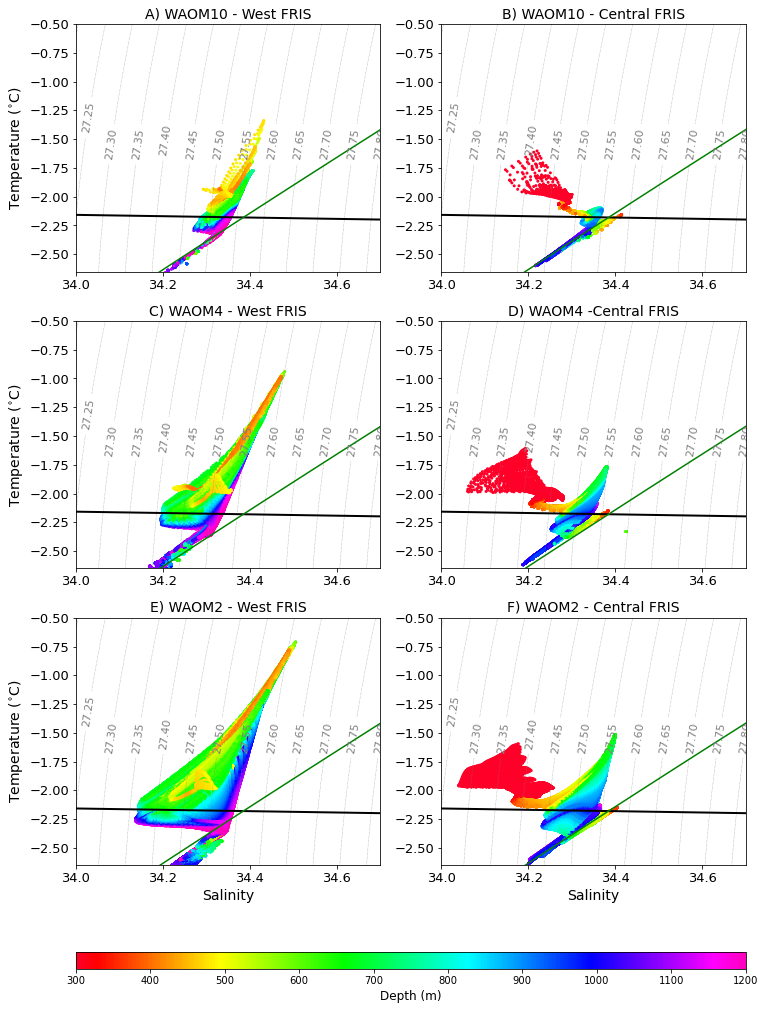

In [8]:
# ts-diagram
fig = plt.figure(figsize=(12,16))

plt.subplot(3,2,1)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,10):
    for s, t in iris.iterate.izip(salt_WWed10[:,:,rang], temp_WWed10[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed10[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('A) WAOM10 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,3)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,24):
    for s, t in iris.iterate.izip(salt_WWed4[:,:,rang], temp_WWed4[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed4[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('C) WAOM4 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,5)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,50):
    for s, t in iris.iterate.izip(salt_WWed2[:,:,rang], temp_WWed2[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed2[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlabel('Salinity',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('E) WAOM2 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,2)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,10):
    for s, t in iris.iterate.izip(salt_EWed10[:,:,rang], temp_EWed10[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed10[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('B) WAOM10 - Central FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,4)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,24):
    for s, t in iris.iterate.izip(salt_EWed4[:,:,rang], temp_EWed4[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed4[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('D) WAOM4 - Central FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

plt.subplot(3,2,6)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,50):
    for s, t in iris.iterate.izip(salt_EWed2[:,:,rang], temp_EWed2[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_EWed2[:,rang], marker='.', edgecolor='none' ,cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
# ax.set_ylabel('Temperature ($^{\circ}$C)')
# ax.set_xlabel('Salinity',fontsize=12)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('F) WAOM2 - Central FRIS', fontsize=14)
ax.set_xlabel('Salinity',fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
# plt.plot(si,Tgade,'-',color='brown')
plt.plot(si,Tgade2,'-',color='green')

cbar_ax2 = fig.add_axes([0.125, 0.06, 0.775, 0.015])
cbts = fig.colorbar(scat, cax=cbar_ax2, orientation='horizontal')
cbts.ax.set_xlabel('Depth (m)',fontsize=12)

fig_path='/users/boeiradi/COLD_project/postprocessing/figs/TS_diagrams/'
name_fig="waom10x4x2extend_shflim_S_0.25Q_RFIS_TSdiag_ext_iceshelf.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, depth, depth_c)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/iris/aux_factory.py:1790: UserWarning: The eta coordinate 'time-averaged free-surface' has bounds. These are being disregarded.
  self._check_dependencies(s, c, eta, 

AttributeError: 'PathCollection' object has no property 'markersize'

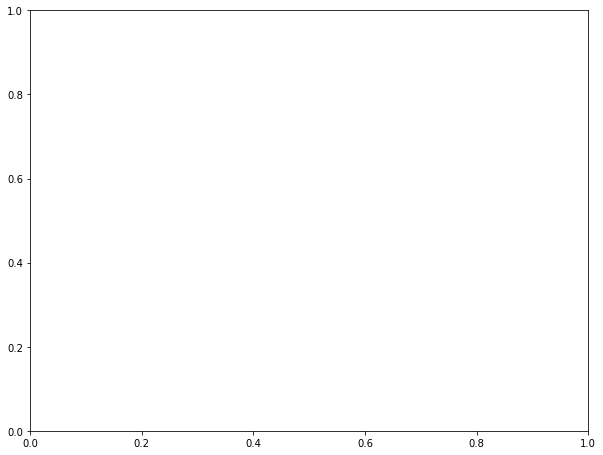

In [16]:
# testing marker size
fig = plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.gcf().subplots_adjust(bottom=0.15)

for rang in np.arange(0,10):
    for s, t in iris.iterate.izip(salt_WWed10[:,:,rang], temp_WWed10[:,:,rang], coords='bathymetry at RHO-points'):
        scat = iplt.scatter(s,t, c=depth_WWed10[:,rang], marker='o', markersize=1000, cmap=plt.cm.gist_rainbow, vmin=300, vmax=1200)
ax = plt.gca()
ax.set_ylabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_xlim([34,34.7])
ax.set_ylim([-2.65,-.5])
plt.title('A) WAOM10 - West FRIS', fontsize=14)
ax.tick_params(labelsize=13)
CS = plt.contour(Si,Ti,dens.transpose(), levels=np.arange(26.,28.2,.05),linestyles='dotted', colors='gray',linewidths=.5)
cbw = plt.contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='dotted', colors='gray',linewidths=.5)
plt.clabel(CS, fontsize=11, inline=1, fmt='%1.2f')
plt.plot(si,Freez_tempE,'-',color='k', linewidth=2)
plt.plot(si,Tgade2,'-',color='green')